### VICTOR models: Analytical Solutions


An analytical solution is implemented for the emplacement of a lava dome

Use this notebook if you are interested in:

1. Analytical solutions - here a solution from Jaupart and Tait is implemented in code

2. Statistical sampling of analytical solutions for hazard problems



### Here is one end-member model of silicic dome growth

How do lava domes grow? What controls the flow rate from a lava dome? What causes these eruptions to stop?

Here, an analytical solution is implemented to try to answer these questions. The solution is primarily from:

#### Reference

Jaupart, C. and Tait, S., 1990. Dynamics of eruptive phenomena. Reviews in Mineralogy and Geochemistry, 24(1), pp.213-238.

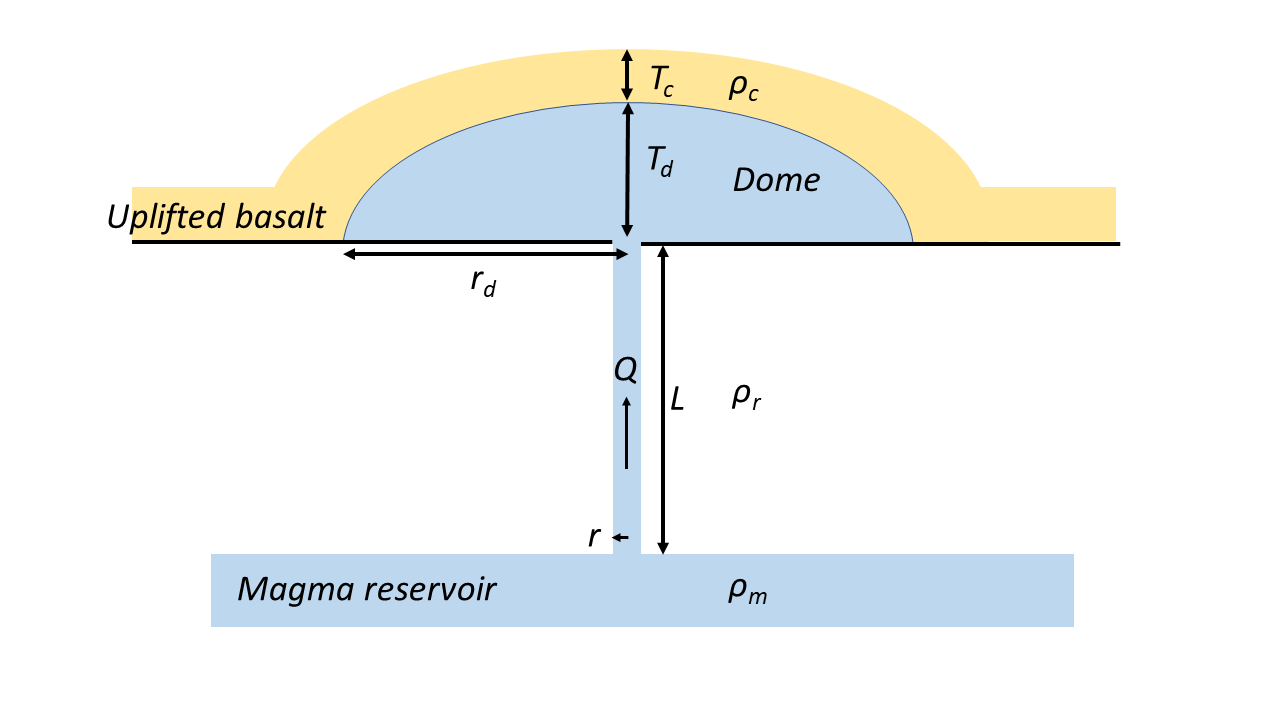

From basic Pouiselle flow in a conduit, volumetric flow is driven by the pressure gradient
$$Q = - \frac{\pi r^4}{8 \mu} \frac{dp}{dx} $$

For buoyant rise, the pressure gradient along the conduit is only the pressure available because of the density difference between magma (lighter)and host rock (heavier):

$$\frac{dp}{dx} = -\frac{(\rho_r - \rho_m) g L}{L}$$

where $L$ is the length of the conduit

$$Q = \frac{\pi r^4 (\rho_r - \rho_m) g}{8 \mu}$$


where:

$r$ = conduit radius

$L$ = conduit length (in this case seems to go from the midcrustal sill to the surface)

$\mu$ is magma viscosity

$\Delta \rho$ is the density difference between the magma and the rock. $\rho_m$ is the density of the magma; $\rho_r$ is the density of the rock. Note that density differences in the crust (layers) may mean that the integrated density must be determined. $\Delta \rho = \rho_r - \rho_m > 0$ for buoyant rise.

$g$ is gravitational acceleration

In this model the magma reservoir pressure is equal to lithostatic pressure: there is no magma overpressure related to bubble nucleation in the magma.


In [1]:
# calculate the expected flow rate of magma for given conditions

import numpy as np
def laminar_flow_pipe(g, mu,r,rho_m, rho_r):
    q = np.pi*r**4*(rho_r - rho_m)*g/(8*mu)
    return q

g = 10 #m/s2
mu = 1000000 #pa s
r = 10 #m

rho_m = 2400 #density of magma
rho_r = 2500 #density of rock

print ("flow rate, q = ", laminar_flow_pipe(g, mu,r,rho_m, rho_r), "m^3/s")

flow rate, q =  3.926990816987241 m^3/s


If one assumes a high viscosity, high yield strength magma (1 MPa s in this example) and a relatively low densty contrast, volumetric flow rate matches observed dome effusion rates.

### For an "eruption" beneath a rock cap - endogenous dome growth

If the dome is endogenous and uplifts a cap, the pressure gradient changes because of the weight of the overlying cap.The 1941 eruptipon of Showa-shinzan dome is an example of such an eruption, where the uplifted cap was largely alluvial gravels.


$$Q = \frac{\pi r^4}{8 \mu} \left [ (\rho_r - \rho_m) g - \frac{\rho_c g T_c}{L}\right ] $$

Note the impact of the basalt cap on the flow rate depends on the length of the conduit (depth of the magma reservoir). This makes sense, a long conduit means the cap causes a small change in the pressure gradient. There is positive flow (eruption) only if:

$$(\rho_r - \rho_m)  > \frac{\rho_c  T_c}{L} $$

Note: it is assumed in the following script the density of the cap is about the same as the density of the magma, but this does not have to be the case.

In [2]:
import numpy as np
def laminar_flow_pipe_cap(g, mu,r,rho_m, rho_r, thick, conduit_length):
    q = np.pi*r**4/(8*mu)*((rho_r - rho_m)*g - rho_m*g*thick/conduit_length)
    return q

g = 10 #m/s2
mu = 1000000 #pa s
r = 10 #m

rho_m = 2400 #density of magma
rho_r = 2500 #density of rock

thick = 300  # thickness of the cap in m
conduit_length = 10000
print ("flow rate, q = ", laminar_flow_pipe_cap(g, mu,r,rho_m, rho_r, thick, conduit_length), "m^3/s")

flow rate, q =  1.0995574287564276 m^3/s


All other things being equal, the work of lifting 300 m of cap reduces the maximum flow rate to about one quarter of its value if the dome erupts at the surface - a rather extreme example!

There are several simplifications, of course, in the above calculation. For example, heat transfer is not considered. Traction is not considered - where traction forces must exist between the caprock and the extruding magma. Consider what other assumptions are made.

Sometimes assumptions seem overwhelming. On the other hand, by making simplifying assumptions a quick answer to the expected effusion rate is tractable.

#### Adding the height of the dome
The height of the dome increases as magma continues to erupt from the conduit, under a cap as an endogenous dome or as an extrusive, exogeneous dome. In either case, the added volume adds an additional static load to the conduit, and reduces the flow rate as the dome builds height.


$$Q = \frac{\pi r^4}{8 \mu} \left [ (\rho_r - \rho_m) g - \frac{\rho_c g T_c}{L} - \frac{\rho_m g T_d}{L}\right ] $$

where $T_d$ is the thickness (height) of the dome. That is, the eruption starts at its maximum flow rate ($T_d = 0$) and decreases in volumetric flow rate as height increases. The eruption stops when:

$$(\rho_r - \rho_m)  = \frac{\rho_c  T_c}{L} +  \frac{\rho_m  T_d}{L}$$

$$ T_d = \frac{(\rho_r - \rho_m) L  - \rho_c  T_c}{\rho_m} $$

which suggests the final dome height (plus previous rocks displaced in the cap) is only a function of density contrasts, thickness of the cap and depth of the source, if the magma is rising buoyantly and there is no magma overpressure.

Yield strength of the dome controls the change in radius of the dome with change in height. Yield strength, $\tau$, is orders of magnitude higher in intermediate and silicic domes than in basaltic magmas because of crystallization, which increases during the eruption or intrusion of the dome. Eventually, enough crystals form in the magma to create a continuous crystal phase that greatly increases the magma yield strength. Saar et al. (2001) found that yield strength rapidly increases with increasing crystal fraction, $\phi$ above the critical threshold at which a continuous phase forms ($\phi_c$). 

The variation in the height can give the expected dome radius:

$$r_d = \frac{\rho_m g T_d^2}{C^2 \tau} $$

where $C^2$ is a constant and $\tau$ is the yield strength (Wilson and Head, 2003).

Another way to think of this is that the radius of the dome is related to the height and volume of the dome, say using a cylindrical approximation to the shape. This is not quite right! The solution neglects traction and related factors, but perhpas works to a first approximation:

$$r_d = \left [ \frac{\rho_m g V^2}{c^ 2 \tau \pi^2} \right]^{1/5} $$ 
where $V$ is the extruded volume of the dome.


#### References
Saar, M.O., Manga, M., Cashman, K.V. & Fremouw, S., 2001. Numerical
models of the onset of yield strength in crystal–melt suspensions, Earth
Planet. Sci. Lett., 187(3–4), 367–379.

Wilson, L. and Head, J.W., 2003. Lunar Gruithuisen and Mairan domes: Rheology and mode of emplacement. Journal of Geophysical Research: Planets, 108(E2).

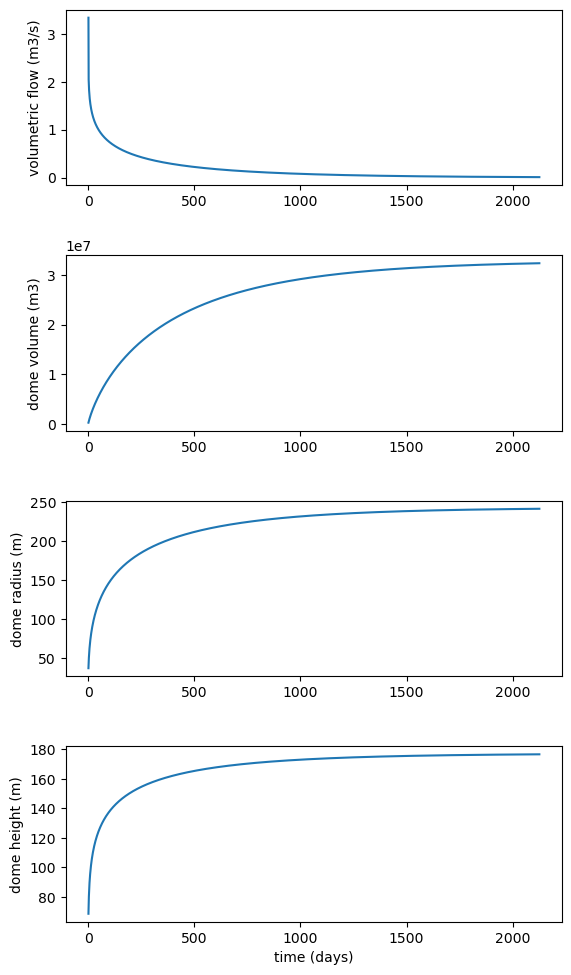

In [3]:
#calculate the extrusion rate, volume, height, and radius of the lava dome
# as a function of time, making the above assumptions.

import numpy as np
import matplotlib.pyplot as plt
def laminar_flow_pipe_cap_dome(g, mu,r,rho_m, 
                               rho_r, rho_c, cap_thick, 
                               dome_thick, conduit_length):
    
    q = np.pi*r**4/(8*mu)*((rho_r - rho_m)*g 
                           - rho_c*g*cap_thick/conduit_length 
                           - rho_m*g*dome_thick/conduit_length)
    return q

g = 10 # gravity - m/s2
mu = 1000000 #viscosity - pa s
r = 10 # conduit radius - m

rho_m = 2400 #density of magma - kg/m3
rho_r = 2500 #density of rock
rho_c = 2500 #density of cap

cap_thick = 30
conduit_length = 5000

c= 1.76 #constant for dome radius vs thickness
tau = 1000000 #dome yield strength

#initialize sets
vol = []
rad = []
ht = []
flow =[]
days = []
#initial conditions
dome_thickness = 0.0
eruption_time = 0
volume = 0.0
for i in range(0,10000,1): #i is eruption time in days
    
    delta_t = 3600.0*24.0 #time in seconds
    eruption_time += delta_t
    q = laminar_flow_pipe_cap_dome(g, mu,r,rho_m, rho_r, rho_c, cap_thick, dome_thickness, conduit_length)
    
    # stop for a low flow rate
    if q < 0.01:
        break
        
    volume += q*delta_t
    dome_radius = (rho_m*g*volume**2/(c**2*tau*np.pi**2))**(1/5)
    dome_thickness = volume/(np.pi*dome_radius**2)
    eruption_time_days = eruption_time/(3600.0*24.0)
    
    vol.append(volume)
    rad.append(dome_radius)
    ht.append(dome_thickness)
    flow.append(q)
    days.append(eruption_time_days)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)

ax1.plot(days, flow, '-')
ax1.set_ylabel('volumetric flow (m3/s)')

ax2.plot(days, vol, '-')
ax2.set_ylabel('dome volume (m3)')

ax3.plot(days, rad, '-')
ax3.set_ylabel('dome radius (m)')

ax4.plot(days, ht, '-')
ax4.set_ylabel('dome height (m)')

ax4.set_xlabel('time (days)')

# set the spacing between subplots
plt.subplots_adjust(bottom=0.1, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig('dome_growth2.pdf')
plt.show()

### What about hazards associated with a growing dome?

Now consider a hazard study. The question is: if a new lava dome starts growing, how tall might it be after one year? How far might block and ash flows extend from the dome during the first year of eruptive activity?

We use the same model to estimate dome growth after one year for a range of eruption source parameters.

We use the Sheridan model - H/L - to estimate run-out, assuming the dome is on flat terrain. Obviously, this needs to be adjusted if the dome eruptions in a crater or on the flanks of a volcano.

#### Reference
Saucedo, R., Macías, J.L., Sheridan, M.F., Bursik, M.I. and Komorowski, J.C., 2005. Modeling of pyroclastic flows of Colima Volcano, Mexico: implications for hazard assessment. Journal of Volcanology and Geothermal Research, 139(1-2), pp.103-115.

median height =  245.81399160834277


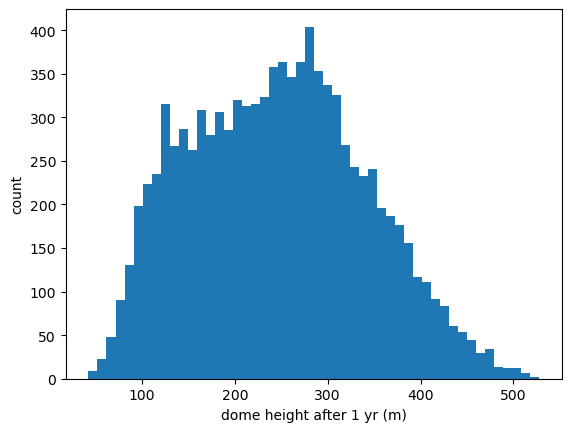

In [4]:
# randomly sample input variables to estimate height of dome after 1 year

import numpy as np
import matplotlib.pyplot as plt
def laminar_flow_pipe_cap_dome(g, mu,r,rho_m, 
                               rho_r, rho_c, cap_thick, 
                               dome_thick, conduit_length):
    
    q = np.pi*r**4/(8*mu)*((rho_r - rho_m)*g 
                           - rho_c*g*cap_thick/conduit_length 
                           - rho_m*g*dome_thick/conduit_length)
    return q

g = 9.8 #m/s2
rad =[]
ht = []
for j in range (10000):
    mu = np.random.uniform(500000, 2500000) # randomly sample the viscosity - pa s
    r = np.random.uniform(10,25) # randomly sample the conduit radius - m

    rho_m = np.random.uniform(2200, 2350)  # randomly sample the density of magma
    rho_r = 2500 #density of rock
    rho_c = 2400 #density of cap

    cap_thick = np.random.uniform(0,50) # randomly sample the thickness of the cap rock
    conduit_length = np.random.uniform(1000, 5000) #randomly sample the conduit length

    c= 1.76 #constant for dome radius vs thickness
    tau = mu #dome yield strength

    #initial conditions
    dome_thickness = 0.0
    eruption_time = 0
    volume = 0.0
    for i in range(0,365,1): #i is eruption time in days
        delta_t = 3600.0*24.0
        eruption_time += delta_t
        q = laminar_flow_pipe_cap_dome(g, mu,r,rho_m, rho_r, rho_c, cap_thick, dome_thickness, conduit_length)
    
        volume += q*delta_t
        dome_radius = (rho_m*g*volume**2/(c**2*tau*np.pi**2))**(1/5)
        dome_thickness = volume/(np.pi*dome_radius**2)
        eruption_time_days = eruption_time/(3600.0*24.0)
    #some conbinations of eruption parameters may not work together   
    if (dome_thickness > 0):
        rad.append(dome_radius)
        ht.append(dome_thickness)
print("median height = ", np.median(ht))
plt.hist(ht, bins=50)
plt.xlabel("dome height after 1 yr (m)")
plt.ylabel ("count")
plt.savefig('height_simulation.pdf')
plt.show()

median runout =  1643.5099763181445


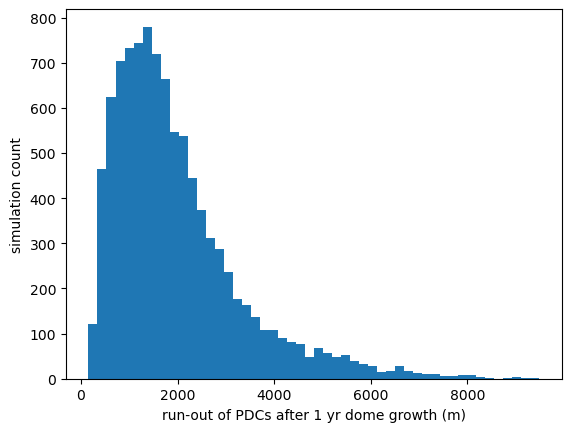

In [5]:
# estimate pdc run-out based on the the distribution of dome height,
# distribution of dome radius (the dome radius affects the starting
# point of the PDC assuming the dome edge collapses)
# and a range of H/L values of 0.05 to 0.35 (see Sheridan papers)
runout=[]
for j in range (len(ht)):
    h_over_l = np.random.uniform(0.05,0.35)
    runout.append(ht[j] / h_over_l + rad[j])
print("median runout = ", np.median(runout))
plt.hist(runout, bins=50)
plt.xlabel("run-out of PDCs after 1 yr dome growth (m)")
plt.ylabel ("simulation count")
plt.savefig('runout_simulation.pdf')
plt.show()

#### More applications

We have started from a simple analytical solution of dome growth (Claude Jaupart's model) and explored the potential variation in effusion rate. Then we related effusion rate to dome growth. The key point is that the effusion rate will decrease as the mass load of the dome increases at the top of the conduit.

Then we considered random variation in eruption source parameters. Random variation in these parameters give rise to variation in dome morphology (height, radius, volume). We considered this potential variation after one year of dome growth for a set of input parameters.

Finally, given the random variation in dome growth, we considered the possible run-out distances of PDCs after one year of dome growth, assuming a flat topography and using the famous H/L model of PDC run-out.

1. Explore the impact of variation in eruption source parameters (ESPs) on the hazard model. What are the most important factors in controlling the potential run-out of the PDCs? That is, explore the sensitivity of hazard to assumptions about the ESPs.

2. This model assumes the dome erupts on to a flat surface. Instead, suppose the dome is in the crater of a volcano, breached to the south, with a 20 degree slope extending south from the dome from a height of 500 m at the breached crater to sea-level. Calculate the change in run-out distance for this dome, given this topographic slope. Hint: the H/L model assumes that the flow stops (reaches its run-out distance) where the energy line defined by H/L intersects the topographic surface.

3. The H/L method is best applied using an actual Digital Elevation Model (DEM) of the topography. How could one incorporate a DEM into this notebook to solve for the actual topography around a specific volcano?